----

# # <span style="color:#0b486b">Face Recognition & Mastering Machine Learning Process</span>




---

---

In [ ]:
from sklearn import datasets

import logging
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# append your own importing packages here if needed

In [ ]:
# this function is a utility to display face images from the dataset
%matplotlib inline  

def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0, 14, str(label[i]))
        p.text(0, 60, str(i))

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = datasets.fetch_lfw_people(min_faces_per_person=60, resize=0.4)

In [ ]:
# store features in variable X and the label in variable y as in our usual convention notation.
X, y = faces.data, faces.target

---

In [ ]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print(faces.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [ ]:
faces


{'DESCR': ".. _labeled_faces_in_the_wild_dataset:\n\nThe Labeled Faces in the Wild face recognition dataset\n------------------------------------------------------\n\nThis dataset is a collection of JPEG pictures of famous people collected\nover the internet, all details are available on the official website:\n\n    http://vis-www.cs.umass.edu/lfw/\n\nEach picture is centered on a single face. The typical task is called\nFace Verification: given a pair of two pictures, a binary classifier\nmust predict whether the two images are from the same person.\n\nAn alternative task, Face Recognition or Face Identification is:\ngiven the picture of the face of an unknown person, identify the name\nof the person by referring to a gallery of previously seen pictures of\nidentified persons.\n\nBoth Face Verification and Face Recognition are tasks that are typically\nperformed on the output of a model trained to perform Face Detection. The\nmost popular model for Face Detection is called Viola-Jones

In [ ]:
import pandas as pd
df_newfaces = pd.DataFrame(faces.data)
df_newfaces['target'] = pd.Categorical(pd.Series(faces.target))



In [ ]:
df_newfaces.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,...,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,91.657730,96.295807,106.113724,118.783974,130.693161,140.000763,146.908203,152.263184,157.012955,161.456284,165.285843,168.459946,170.726883,172.624359,174.169525,175.414917,176.364731,176.809814,177.042282,176.972488,176.465195,175.754974,174.484283,172.953293,170.802200,168.085876,165.062347,161.529160,156.928970,151.868866,146.151016,138.405960,127.722008,115.338799,103.906601,97.259621,95.375328,94.134239,100.582069,112.173355,...,118.648392,112.694603,106.741859,80.283096,85.139771,92.529366,100.391251,106.412659,110.468285,111.964912,109.852364,107.161224,104.821449,101.466141,98.104561,98.153488,99.918732,102.405579,104.552841,105.676857,106.522278,107.348633,107.567970,107.120689,105.949257,104.139931,102.151535,99.485909,96.869370,95.425575,96.936211,101.459000,107.686470,116.277435,124.545151,128.382553,126.331581,121.295006,114.244110,106.911407
std,46.351109,44.923618,43.431442,42.174377,40.324924,37.499157,35.836983,34.916065,33.906464,32.757744,31.597519,30.842575,30.416994,30.032383,29.524981,29.153730,29.054064,29.035847,29.050947,28.954733,28.926020,28.826485,29.214344,30.102644,30.966478,31.822941,32.741394,33.835155,34.981113,36.219257,37.408962,39.231625,41.633392,44.346561,46.051231,48.113281,49.460625,45.507931,43.982086,42.214798,...,74.702545,75.661713,76.908554,67.268074,69.692520,72.170181,74.443665,74.036819,72.233360,69.671463,66.631302,60.562840,55.968239,50.609348,44.515251,40.770206,38.352325,37.406288,36.757023,36.292850,36.428703,36.820042,36.897762,36.819599,36.427250,36.418819,36.228466,35.970612,37.738041,41.155155,45.554867,50.626778,56.942051,62.579365,68.789551,71.935867,74.754417,76.945793,77.375359,78.459785
min,0.000000,0.000000,0.333333,1.000000,1.666667,2.000000,3.666667,11.000000,11.333333,13.333333,15.333333,17.333334,18.666666,21.333334,20.666666,21.000000,22.000000,24.666666,26.333334,26.666666,26.666666,27.000000,26.000000,25.666666,22.333334,19.666666,16.666666,15.000000,15.333333,12.333333,9.333333,2.666667,3.333333,1.000000,0.333333,0.666667,0.000000,0.000000,0.000000,1.333333,...,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.666667,2.333333,4.333333,7.000000,7.333333,8.000000,8.000000,7.333333,6.333333,6.000000,8.333333,9.333333,9.000000,6.666667,2.666667,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.666667,0.000000,0.000000,0.000000,0.000000
25%,57.833333,63.333332,76.000000,92.666664,105.333336,116.666664,123.583332,130.333328,136.333328,140.916668,146.000000,149.000000,152.000000,155.333328,157.000000,158.666672,160.583336,160.666672,160.000000,159.666672,159.000000,159.000000,156.666672,155.000000,152.666672,148.916

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
df_newfaces.describe()
# Student can use different field such as data, images target_names to get the number of data points 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,...,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,91.657730,96.295807,106.113724,118.783974,130.693161,140.000763,146.908203,152.263184,157.012955,161.456284,165.285843,168.459946,170.726883,172.624359,174.169525,175.414917,176.364731,176.809814,177.042282,176.972488,176.465195,175.754974,174.484283,172.953293,170.802200,168.085876,165.062347,161.529160,156.928970,151.868866,146.151016,138.405960,127.722008,115.338799,103.906601,97.259621,95.375328,94.134239,100.582069,112.173355,...,118.648392,112.694603,106.741859,80.283096,85.139771,92.529366,100.391251,106.412659,110.468285,111.964912,109.852364,107.161224,104.821449,101.466141,98.104561,98.153488,99.918732,102.405579,104.552841,105.676857,106.522278,107.348633,107.567970,107.120689,105.949257,104.139931,102.151535,99.485909,96.869370,95.425575,96.936211,101.459000,107.686470,116.277435,124.545151,128.382553,126.331581,121.295006,114.244110,106.911407
std,46.351109,44.923618,43.431442,42.174377,40.324924,37.499157,35.836983,34.916065,33.906464,32.757744,31.597519,30.842575,30.416994,30.032383,29.524981,29.153730,29.054064,29.035847,29.050947,28.954733,28.926020,28.826485,29.214344,30.102644,30.966478,31.822941,32.741394,33.835155,34.981113,36.219257,37.408962,39.231625,41.633392,44.346561,46.051231,48.113281,49.460625,45.507931,43.982086,42.214798,...,74.702545,75.661713,76.908554,67.268074,69.692520,72.170181,74.443665,74.036819,72.233360,69.671463,66.631302,60.562840,55.968239,50.609348,44.515251,40.770206,38.352325,37.406288,36.757023,36.292850,36.428703,36.820042,36.897762,36.819599,36.427250,36.418819,36.228466,35.970612,37.738041,41.155155,45.554867,50.626778,56.942051,62.579365,68.789551,71.935867,74.754417,76.945793,77.375359,78.459785
min,0.000000,0.000000,0.333333,1.000000,1.666667,2.000000,3.666667,11.000000,11.333333,13.333333,15.333333,17.333334,18.666666,21.333334,20.666666,21.000000,22.000000,24.666666,26.333334,26.666666,26.666666,27.000000,26.000000,25.666666,22.333334,19.666666,16.666666,15.000000,15.333333,12.333333,9.333333,2.666667,3.333333,1.000000,0.333333,0.666667,0.000000,0.000000,0.000000,1.333333,...,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.666667,2.333333,4.333333,7.000000,7.333333,8.000000,8.000000,7.333333,6.333333,6.000000,8.333333,9.333333,9.000000,6.666667,2.666667,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.666667,0.000000,0.000000,0.000000,0.000000
25%,57.833333,63.333332,76.000000,92.666664,105.333336,116.666664,123.583332,130.333328,136.333328,140.916668,146.000000,149.000000,152.000000,155.333328,157.000000,158.666672,160.583336,160.666672,160.000000,159.666672,159.000000,159.000000,156.666672,155.000000,152.666672,148.916

In [ ]:
df_newfaces['target'].describe()

count     1348
unique       8
top          3
freq       530
Name: target, dtype: int64

In [ ]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# print out the number of classes, and the corresponding name of each class
class_ids=np.unique(y)
class_names = np.unique(X)
print(class_ids)
print(faces.target_names)

#for i in range(len(class_ids)):


[0 1 2 3 4 5 6 7]
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [ ]:
%matplotlib inline  

def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0, 14, str(label[i]))
        p.text(0, 60, str(i))

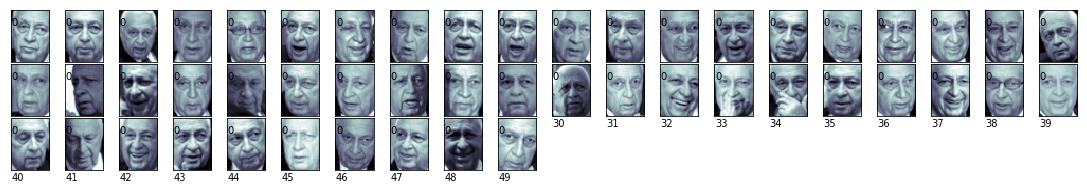

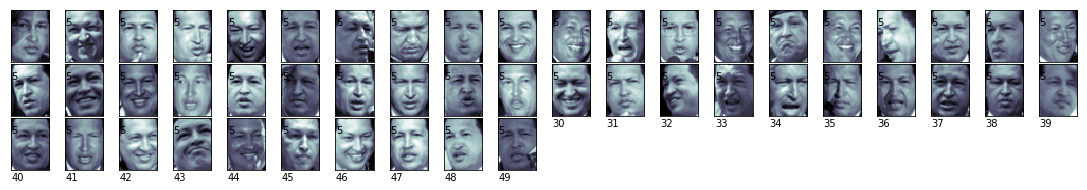

In [ ]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
display_faces(faces.images[faces.target==0],faces.target[faces.target==0],50)
display_faces(faces.images[faces.target==5],faces.target[faces.target==5],50)
# print out 50 photos of Ariel Sharon and 50 photos of Hugo Chavez

 create *a single train-split* with 20% of data for testing and the rest for training.
<div style="text-align: right"><span style="color:red">**[2 points]**</span></div> 

In [ ]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

from sklearn.model_selection import train_test_split

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=30)

---

Use a *single split-train approach* and *Logistic Regression* as the classifier, you will examine what works and what doesn't work for your data:



code to use PCA for dimensionality reduction with 20 components to transform variable X to variable pca_X.**
<div style="text-align: right"> <span style="color:red"></span> </div>

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from sklearn.decomposition import PCA
pca = PCA(n_components=20,random_state=20)
print(pca)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=20,
    svd_solver='auto', tol=0.0, whiten=False)


In [ ]:
pca_X = pca.fit_transform(X)
pcaframe = pd.DataFrame(pca_X)
pca_n = [pcaframe,pd.DataFrame(y,columns = ['label'])]
pca_n = pd.concat(pca_n,axis = 1)

In [ ]:
print(pca_n)

                0            1           2  ...          18          19  label
0      911.340515   504.051544  501.100647  ...  -32.183376  120.834320      1
1      555.029297  -522.771179  372.223480  ...   72.925896  -63.666546      3
2       29.072786  -215.534210  205.907547  ... -150.218246   10.167986      3
3      -61.317551   342.736084 -372.468475  ...   54.996578 -217.512283      3
4     1250.116455  -160.970062  236.107529  ...  -14.012425  146.003769      5
5      467.946869 -1054.750977  430.840576  ...  -44.728794  -42.170841      3
6      343.435181  -101.962646 -100.483925  ...   98.767899  -23.909554      6
7     -661.289185  -819.148071 -527.695251  ...   -0.177003 -274.794525      3
8     -507.594849  -236.978302 -609.509949  ... -113.643661 -109.152191      7
9    -1089.520264  -361.644806  127.325378  ...   43.776169  -37.648533      0
10    -225.945572  1200.957153 -192.166428  ...  307.047455   20.059069      3
11     224.595139  -889.067017  372.225464  ...  178

#### <span style="color:red"></span> **Use the reduced dimension features pca_X obtained in previous steps to write your code to show the performance (recall, precision, accuracy, F-score) using *Logistic Regression* as the classifier and a single train-split with 40% of data will be used for testing and the rest for training.**

> 



In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

X_train,X_test,y_train,y_test = train_test_split(pca_n.iloc[:,:20],pca_n['label'],test_size = 0.4, random_state=35)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=35, penalty = 'l1')

In [ ]:
logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=35, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predicted_values = logreg.predict(X_test)

In [ ]:
print("Accuracy: ",accuracy_score(y_test,predicted_values)*100,"%")
print("Precision: ",precision_score(y_test,predicted_values,average = "macro")*100,"%")
print("Recall: ",recall_score(y_test,predicted_values,average = "macro")*100,"%")
print("F1 Score: ",f1_score(y_test,predicted_values,average = "macro")*100,"%")

Accuracy:  60.55555555555555 %
Precision:  58.23113706585465 %
Recall:  48.523691759707106 %
F1 Score:  51.423049177188965 %


<span style="color:red">**(c)**</span> **Use the reduced dimension features pca_X obtained in step (a) to write your code to show the performance (recall, precision, accuracy, F-score) *using Repeated Random Train-Split* (10 runs, each with 60/40 split for training and testing) on the original data. You *must* report both the mean and standard deviation of the performance for each evaluation metrics**.
<div style="text-align: right"> <span style="color:red">**[8 points]**</span> </div>

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
sufsplit = ShuffleSplit(n_splits=10, test_size=.4,train_size=.6, random_state=40)
sufsplit.get_n_splits(pca_n)
print(sufsplit)
n_logreg = LogisticRegression(random_state=40)

#Recall 
shuffle_recall = cross_val_score(n_logreg,pca_n.iloc[:,:20],pca_n['label'],cv = sufsplit,scoring='recall_macro')
shuffle_recall_mean = shuffle_recall.mean()
shuffle_recall_std = shuffle_recall.std()
#Precision 
shuffle_precision = cross_val_score(n_logreg,pca_n.iloc[:,:20],pca_n['label'],cv = sufsplit,scoring='precision_macro')
shuffle_precision_mean = shuffle_precision.mean()
shuffle_precision_std = shuffle_precision.std()
#accuracy
shuffle_accuracy = cross_val_score(n_logreg,pca_n.iloc[:,:20],pca_n['label'],cv = sufsplit,scoring='accuracy')
shuffle_accuracy_mean = shuffle_accuracy.mean()
shuffle_accuracy_std = shuffle_accuracy.std()
#F1 Macro
shuffle_F1 = cross_val_score(n_logreg,pca_n.iloc[:,:20],pca_n['label'],cv = sufsplit,scoring='f1_macro')
shuffle_F1_mean = shuffle_F1.mean()
shuffle_F1_std = shuffle_F1.std()

print("\n Repeated Random Train Test Split\n")

print("Accuracy :",(shuffle_accuracy_mean,shuffle_accuracy_std))
print("Precision :",(shuffle_precision_mean,shuffle_precision_std))
print("Recall :",(shuffle_recall_mean,shuffle_recall_std))
print("F1score :",(shuffle_F1_mean,shuffle_F1_std))



ShuffleSplit(n_splits=10, random_state=40, test_size=0.4, train_size=0.6)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed


 Repeated Random Train Test Split

Accuracy : (0.592037037037037, 0.016293139424869728)
Precision : (0.5583407901385665, 0.029234824527598118)
Recall : (0.47113387616626545, 0.013855489786359702)
F1score : (0.4899756512392853, 0.0192147990129044)


<span style="color:red">**(d)**</span> **Use the reduced dimension features pca_X obtained in step (a) to write your code to show the performance (recall, precision, accuracy, F-score) using *K-fold cross-validation with k=10 folds*.**
<div style="text-align: right"> <span style="color:red">**[10 points]**</span> </div>

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

from sklearn.model_selection import KFold
kfold = KFold(n_splits = 10,random_state=36)
kfold.get_n_splits(pca_n)

#Recall 
shufflerecall_kf = cross_val_score(n_logreg,pca_n.iloc[:,:20],pca_n['label'],cv = kfold,scoring='recall_macro')
shufflerecall_kf_mean = shufflerecall_kf.mean()
shufflerecall_kf_std = shufflerecall_kf.std()
#Precision 
shuffleprecision_kf = cross_val_score(n_logreg,pca_n.iloc[:,:20],pca_n['label'],cv = kfold,scoring='precision_macro')
shuffleprecision_kf_mean = shuffleprecision_kf.mean()
shuffleprecision_kf_std = shuffleprecision_kf.std()
#accuracy
shuffleaccuracy_kf = cross_val_score(n_logreg,pca_n.iloc[:,:20],pca_n['label'],cv = kfold,scoring='accuracy')
shuffleaccuracy_kf_mean = shuffleaccuracy_kf.mean()
shuffleaccuracy_kf_std = shuffleaccuracy_kf.std()
#F1 
shuffleF1_kf = cross_val_score(n_logreg,pca_n.iloc[:,:20],pca_n['label'],cv = kfold,scoring='f1_macro')
shuffleF1_kf_mean = shuffleF1_kf.mean()
shuffleF1_kf_std = shuffleF1_kf.std()

print("\n KFold \n")
print("Accuracy:",(shuffleaccuracy_kf_mean,shuffleaccuracy_kf_std))
print("Precision:",(shuffleprecision_kf_mean,shuffleprecision_kf_std))
print("Recall :",shufflerecall_kf_mean,shufflerecall_kf_std)
print("f1score :",(shuffleF1_kf_mean,shuffleF1_kf_std))







/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed


 KFold 

Accuracy: (0.6158098396904367, 0.04934675568873201)
Precision: (0.5775306460517415, 0.057735740098037225)
Recall : 0.49244156243628207 0.04483024637673206
f1score : (0.5058855307339751, 0.046229537438883125)


<span style="color:red">**(e)**</span> **Preparing a table to summarize the performances obtained from step (c) and (d) against recall, precision, accuracy and F-score from step (b). What conclusions can you draw from the comparison?**
<div style="text-align: right"> <span style="color:red">**[10 points]**</span> </div>

*Use this markdown cell to write your answer to this question.*

---
  |   |Recall  | precision | Accuracy . | F-score
  |---|---|---|---|---|
  |logistic reg  | 48.52    |  58.23   |    60.55    |    51.42
  |RRTT(MEAN)    | 0.47     |0.55      |  0.59       |  0.4899      
  |RRTT(STD)     | 0.013    |0.02      |  0.016      |  0.019
  |KFOLD MEAN    | 0.49     | 0.577    |   0.61      |   0.50
  |KFOLD STD     | 0.44     | 0.057    |   0.049     |   0.046       
 




<span style="color:red">**Question 2.2.**</span> **Once you have built some intuition about the problem and the effectiveness of some modelling choices, if the initial results aren't too bad, you should start to gain some confidences in your approach. You are recommended to look at your results in the previous question again to convince yourselves of your results. Some questions you should starting asking are: Is your average prediction accuracy over 50%? over 70%? What else can you try to make it better? Is Linear SVM a good choice? Did the reduced dimension help improve the performance?**

**The next step is then to 'package' your code into some routine so that your investigation into your machine learning problem can be accelerated.**

The total marks for this question are <span style="color:red">**[23 points]**</span>, with the following detailed breakdown sub-questions:

**The following function is provided for you as an example of how one might 'package' the important steps so far into a single function to help accelerate your analyses**.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

def ml_algorithm_screening_face(X,y,model, model_name, scoring_metrics, pca_dim, n_runs):
    estimators = []
    seed = 10
    if (pca_dim > 0):
        estimators.append(('pca', decomposition.PCA(n_components=pca_dim)))
    
    estimators.append((model_name,model))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits=n_runs, random_state=seed)
    try:
        results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring_metrics, verbose=1, n_jobs=-1)
    except ValueError:
        print("Opps! something went wrong!")
        
    return results

**Using  this function given above, you are asked to:**

<span style="color:red">**(a)**</span> **Write your code to call this function with the following specifications and print out the mean and standard deviation of the *accuracy* obtained.**
    - model: Linear SVM (using hinge loss)
    - PCA dimnesion = 20
    - the number of runs=10
    
<div style="text-align: right"> <span style="color:red">**[8 points]**</span> </div>

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from sklearn.svm import LinearSVC
model = LinearSVC(loss='hinge')
scoring_metrics = "accuracy"

res = ml_algorithm_screening_face(X,y,model,"Linear SVM", scoring_metrics \
                                  , 20 ,10)
print("Average accuracy: " + str(res.mean()))
print("standard deviation of the accuracy: " + str(res.std()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Average accuracy: 0.3472470978441128
standard deviation of the accuracy: 0.04550495047174712


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.9s finished


<span style="color:red">**(b)**</span>**Face recognition has a high-dimensional data problem typical  in modern machine learning. This explains why one might routinely use PCA to reduce its dimension.**

**Write your code to search for right dimension from a list of *dim = {10, 20,..,150}* using the same setting in question 2.2(a).**
- Print out the results for each dimension.
- Use box-plot to visualize the medium and the interquartile range of the accuracy for each dimension on the same figure, and 
- Report the dimension for PCA that gives the best result in term of accuracy.

<div style="text-align: right"> <span style="color:red">**[15 points]**<span> </div>

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
import numpy as np

i=0
accuracy_rate=np.zeros((10,15))

for dim in range(10,10+15*10,10):
    print(dim)
    final_res = ml_algorithm_screening_face(X,y,model,"Linear SVM","accuracy", dim, 10)
    accuracy_rate[:,i]=np.array(final_res)
    i=i+1

10


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


20


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


30


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


40


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


50


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


60


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   22.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


70


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   25.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


80


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   27.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


90


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   30.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


100


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   34.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


110


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   37.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


120


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   39.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


130


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   41.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


140


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   43.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


150


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   47.1s finished


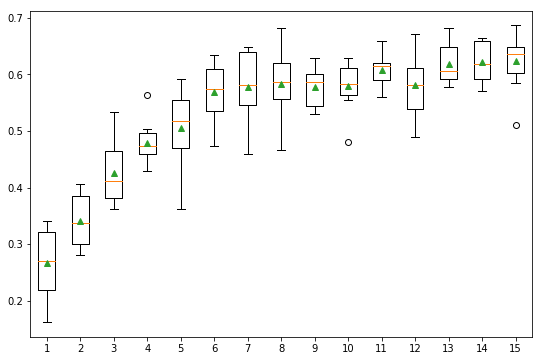

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)    
bp = ax.boxplot(accuracy_rate, showmeans=True)
plt.show()

In [ ]:
accuracy_means=accuracy_rate.mean(axis=0)
max_index=np.argmax(accuracy_means)
best_Dim=10+10*max_index
print("Best dimension for PCA ",best_Dim)
print(" Accuracy for Best dimension:", accuracy_means[max_index])

Best dimension for PCA  150
 Accuracy for Best dimension: 0.6239524599226092
